In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [3]:
df = pd.read_csv("../datasets/Bike Sharing/preprocessed_hour.csv")
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.224490,0.2879,0.81,0.0,16
1,0.0,0.0,0.0,0.043478,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,40
2,0.0,0.0,0.0,0.086957,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,32
3,0.0,0.0,0.0,0.130435,0.0,1.0,0.0,0.0,0.224490,0.2879,0.75,0.0,13
4,0.0,0.0,0.0,0.173913,0.0,1.0,0.0,0.0,0.224490,0.2879,0.75,0.0,1


In [4]:
X = df.copy()
y = X.pop("cnt")
colnames = X.columns

In [5]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

Feature: 0, Score: 0.02316
Feature: 1, Score: 0.07961
Feature: 2, Score: 0.01568
Feature: 3, Score: 0.61024
Feature: 4, Score: 0.00278
Feature: 5, Score: 0.01294
Feature: 6, Score: 0.06177
Feature: 7, Score: 0.01856
Feature: 8, Score: 0.12114
Feature: 9, Score: 0.01804
Feature: 10, Score: 0.02570
Feature: 11, Score: 0.01038


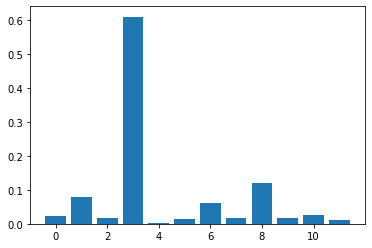

In [6]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [7]:
cart = DecisionTreeRegressor()
cart.fit(X,y)
ranks["CART"] = ranking(cart.feature_importances_, colnames);
ranks

{'CART': {'season': 0.03,
  'yr': 0.13,
  'mnth': 0.02,
  'hr': 1.0,
  'holiday': 0.0,
  'weekday': 0.02,
  'workingday': 0.1,
  'weathersit': 0.03,
  'temp': 0.19,
  'atemp': 0.03,
  'hum': 0.04,
  'windspeed': 0.01}}

In [8]:
decimalrank_df = pd.DataFrame()

# Join preranks in dataframe
for method_name, rank_list in ranks.items():
    df_Temp = pd.DataFrame(data = {method_name:pd.Series(rank_list)})
    decimalrank_df = pd.concat([decimalrank_df,df_Temp ], axis=1)

rank_df = pd.DataFrame()
# Create new integer ranks
for method_name, rank_list in ranks.items():
    rank_df[method_name] = decimalrank_df[method_name].rank(ascending=False)

rank_df['feature_name'] = rank_df.index

In [9]:
ranksout = rank_df.melt(id_vars = 'feature_name', var_name='method', value_name='feature_rank')
ranksout['dataset'] = 'Bike_sharing'
ranksout

,feature_name,method,feature_rank,dataset
0,season,CART,7.0,Bike_sharing
1,yr,CART,3.0,Bike_sharing
2,mnth,CART,9.5,Bike_sharing
3,hr,CART,1.0,Bike_sharing
4,holiday,CART,12.0,Bike_sharing
5,weekday,CART,9.5,Bike_sharing
6,workingday,CART,4.0,Bike_sharing
7,weathersit,CART,7.0,Bike_sharing
8,temp,CART,2.0,Bike_sharing
9,atemp,CART,7.0,Bike_sharing


In [10]:
ranksout.to_csv('../data/CART/bike_sharing_featureranks_CART.csv', sep=';',index=False)